In [1]:
# Import all necesssary libraries and packages

import numpy as np
import pandas as pd

# visualization libararies
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [2]:
# read dataset
df = pd.read_csv('./diabetes_dirty.csv')

In [3]:
# View the first 5 entries of the dataset
df.head(5)

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6  PROGRESSION
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87          151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69           75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85          141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89          206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80          135

In [4]:
# Data summary sgtatistics

df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6  PROGRESSION  
count  442.000000  442.000000  442.000000  442.000000   442.000000  
mean    49.788462    4.070249    4.641411   91.260181   152.133484  
std     12.934202    1.290450    0.522391   11.496335    77.093005  
min     22.000000    2.000000    3.258100   58.000000    25.000000  
25%     40.250000    3.000000    4.276700   83.250000    87.000000  
50%     48.000000    4.000000    4.620050   91.000000   140.500000  
75%     57.750000    5.000000    4.997200   98.000000   211.500000  
max     99.000000    9.090000    6.107000  124.000000   346.000000

In [5]:
df.shape

(442, 11)

<Axes: >

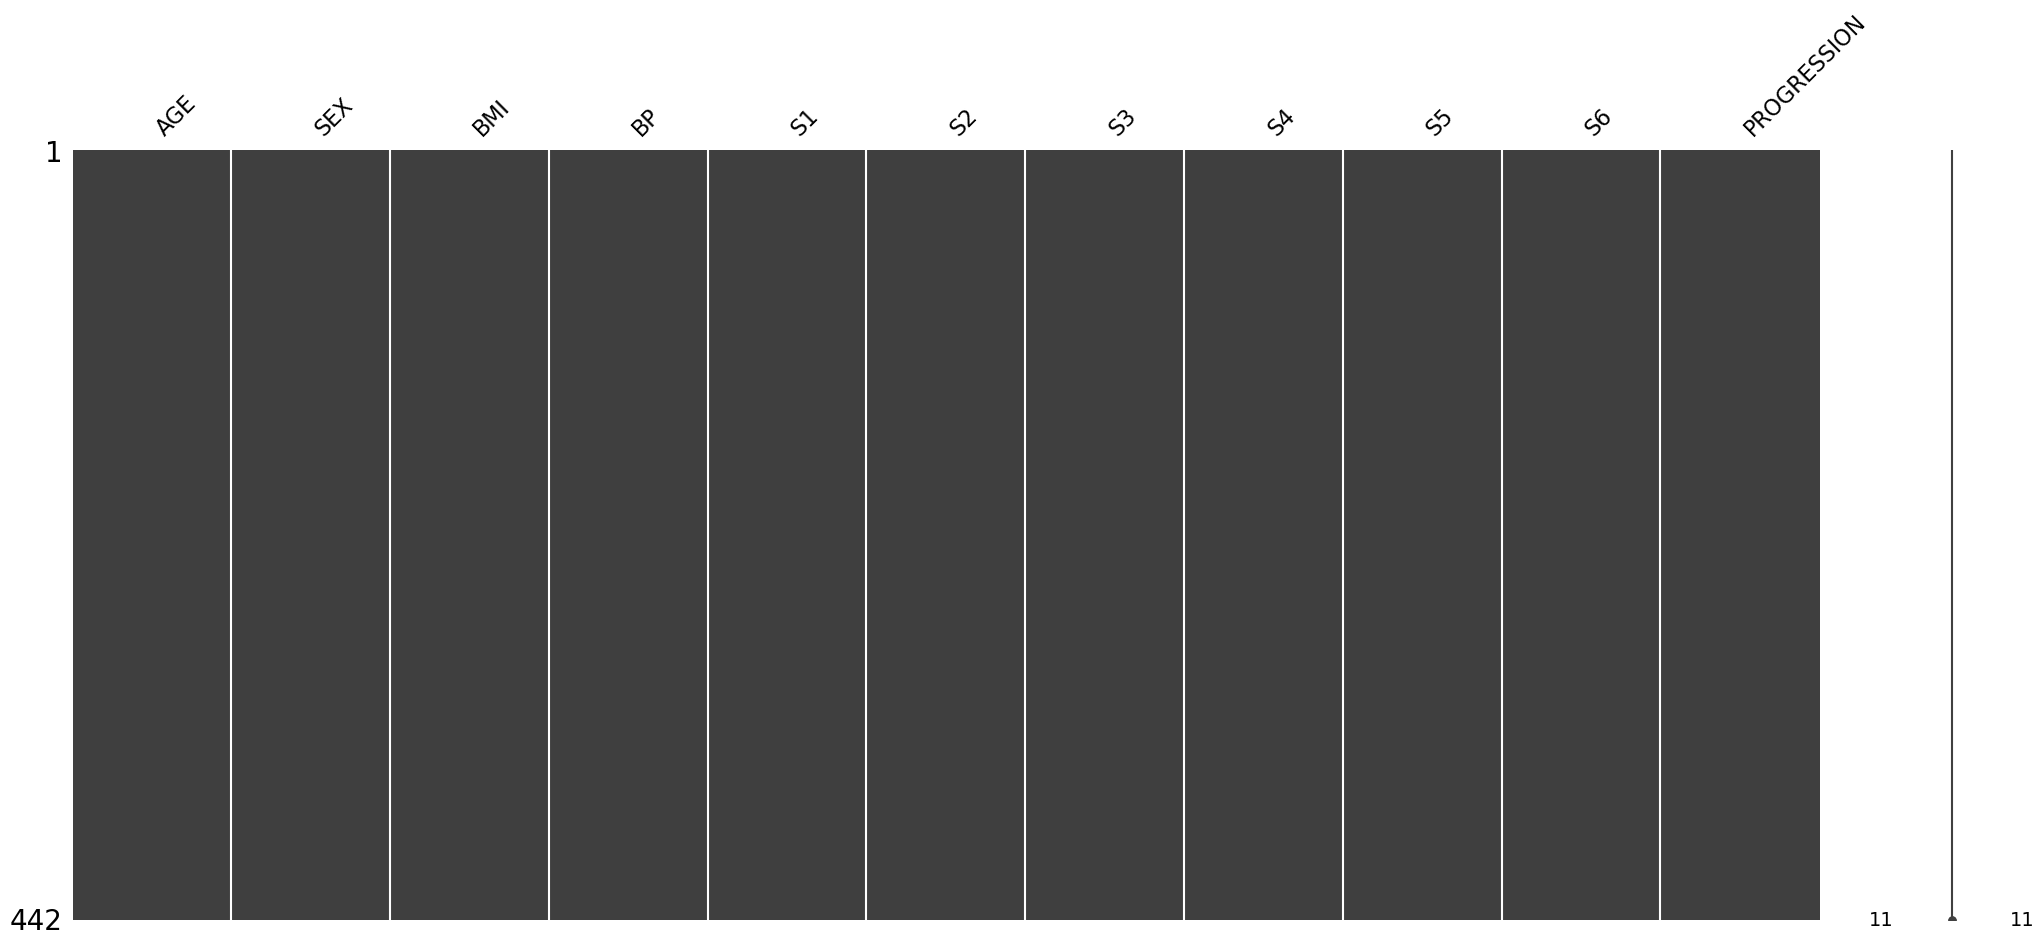

In [6]:
# Visualize missing values
msn.matrix(df)

No missing values.

In [7]:
# x = df['SEX']
# x.sample(5)
# # df['sex'].unique()

<Axes: >

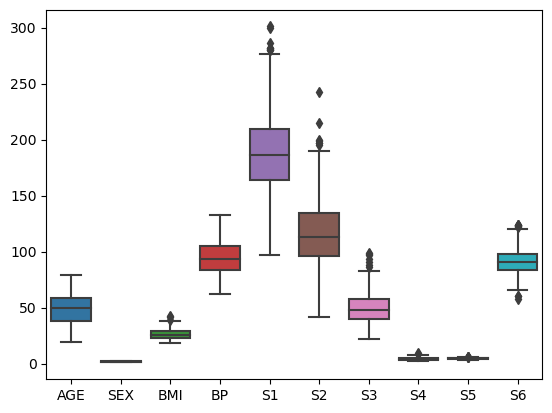

In [8]:
sns.boxplot(df.drop(columns=['PROGRESSION']))

/home/eedriz_/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


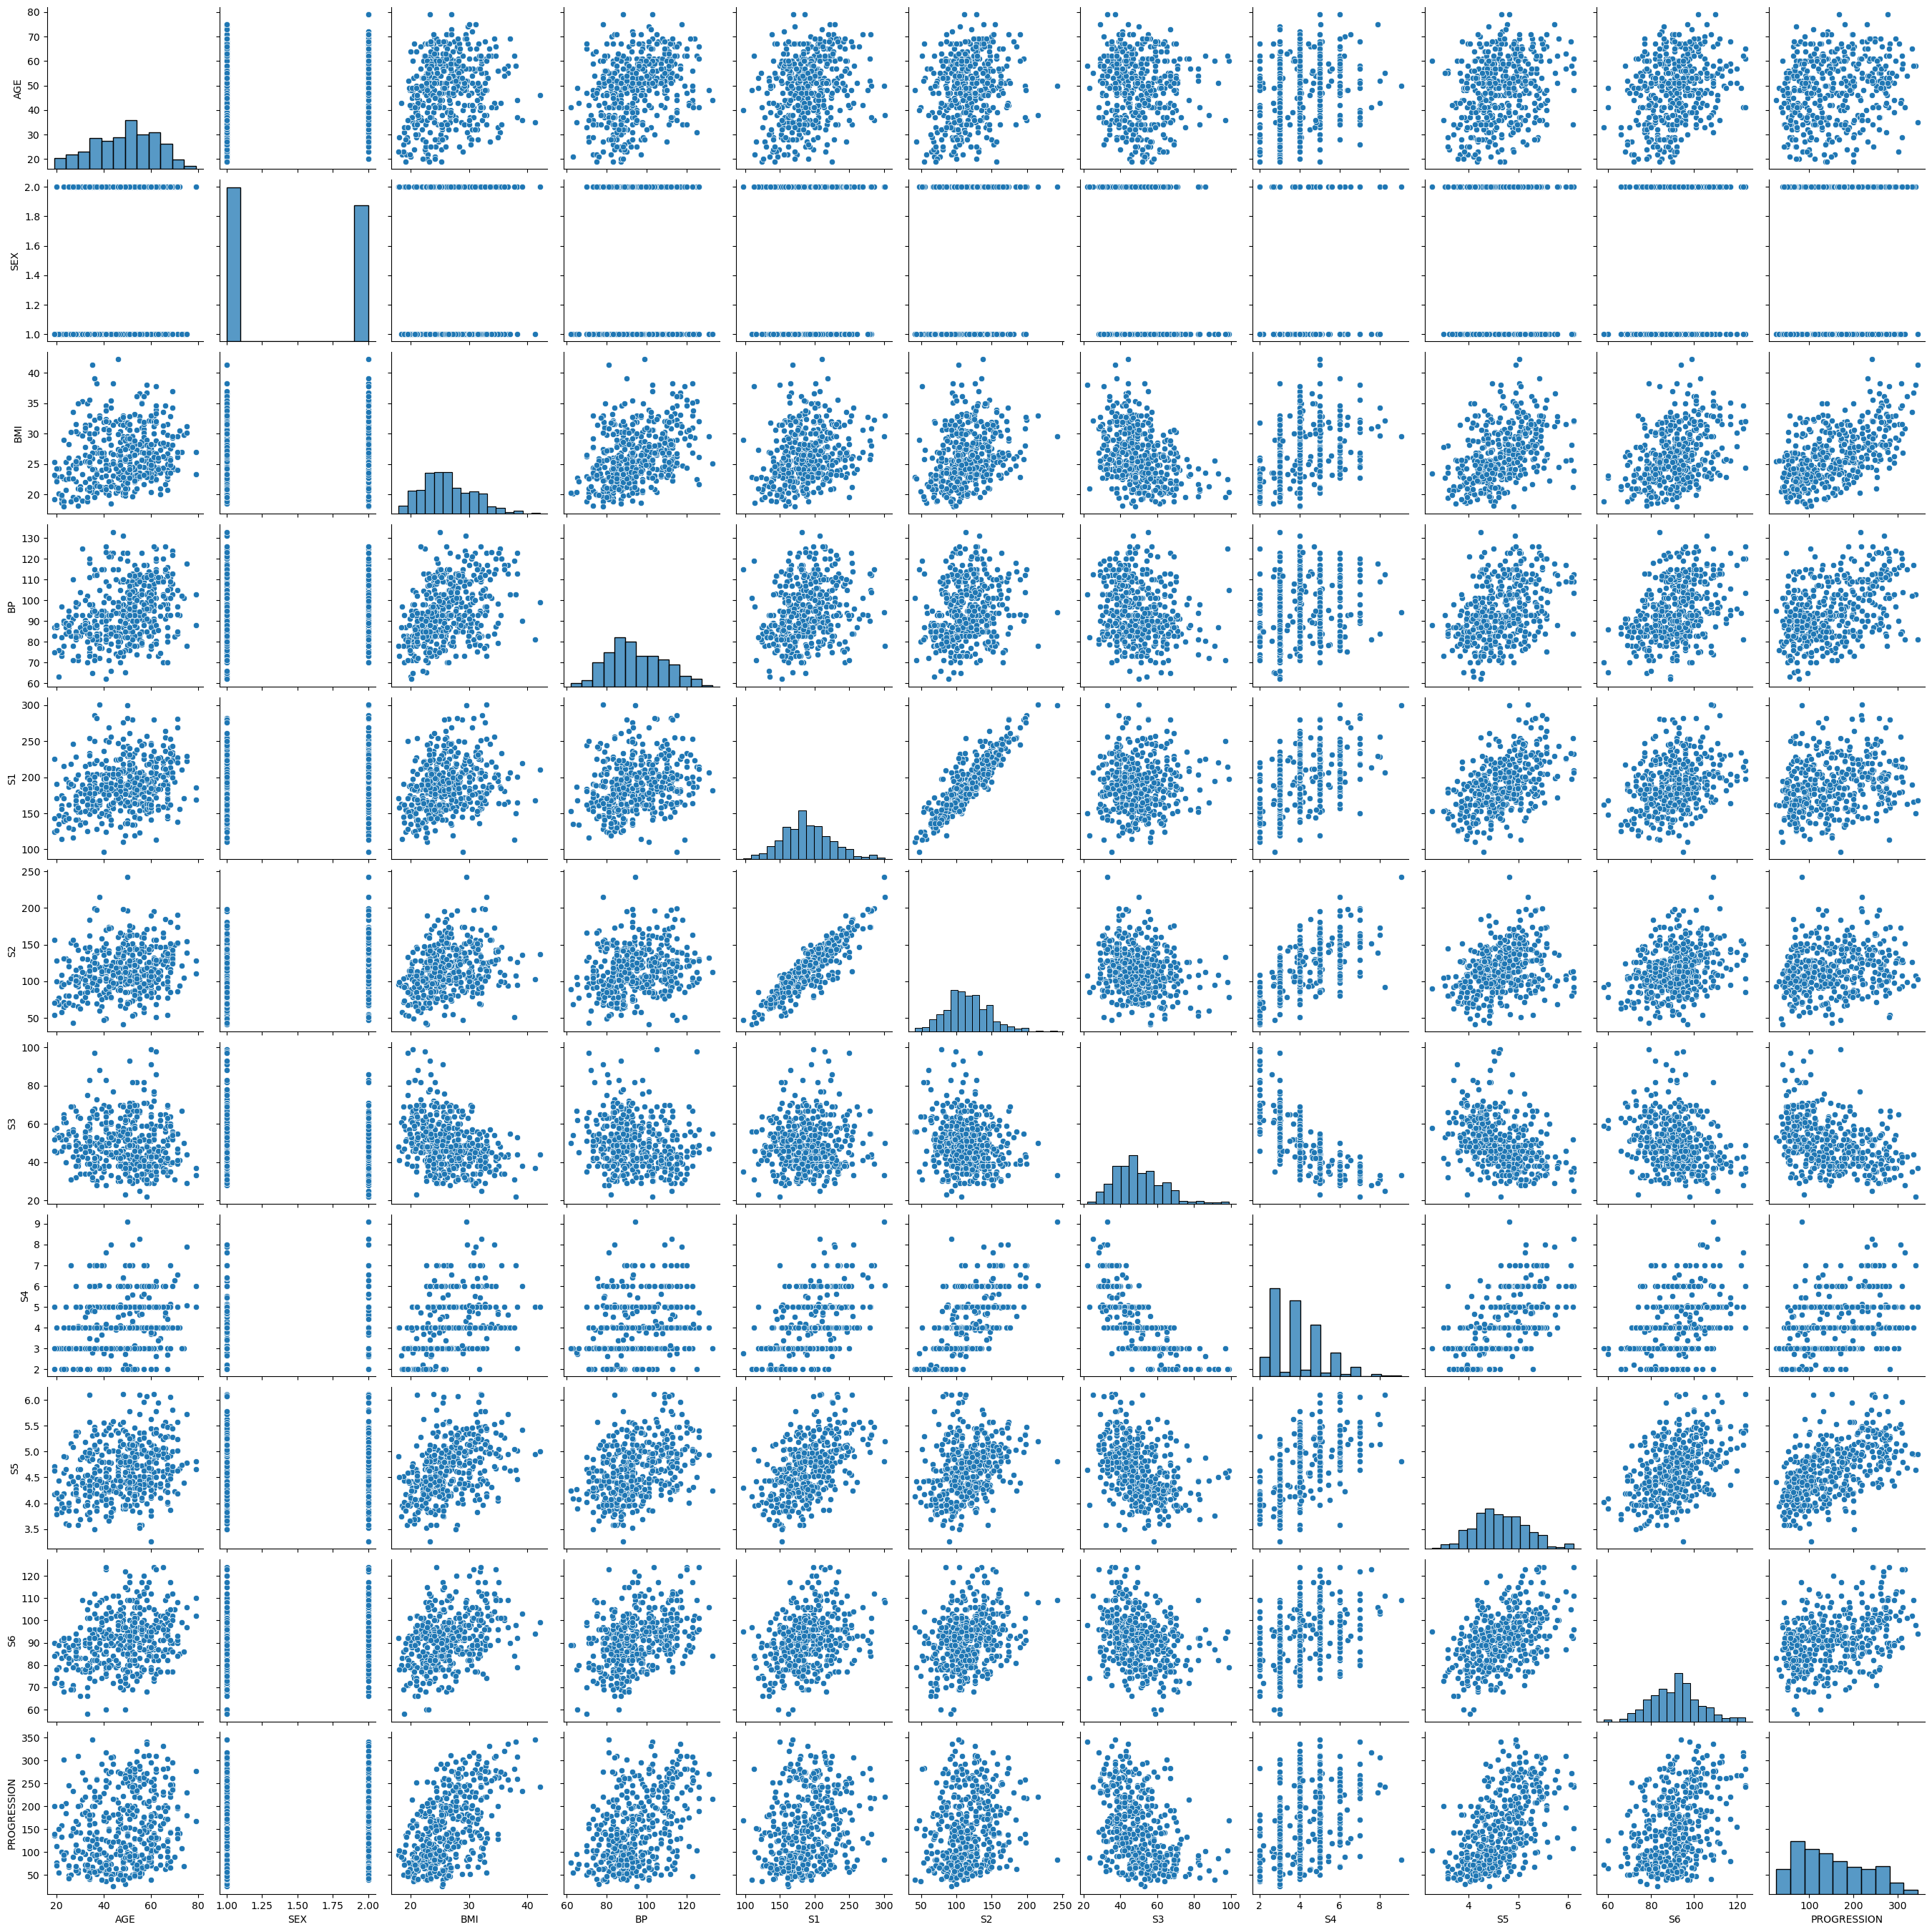

In [9]:
# View the bivariate and univariate distribution using pairplot
# plt.figure(fig)
sns.pairplot(df)
plt.show()

In [10]:
from scipy.stats import mstats

<Axes: >

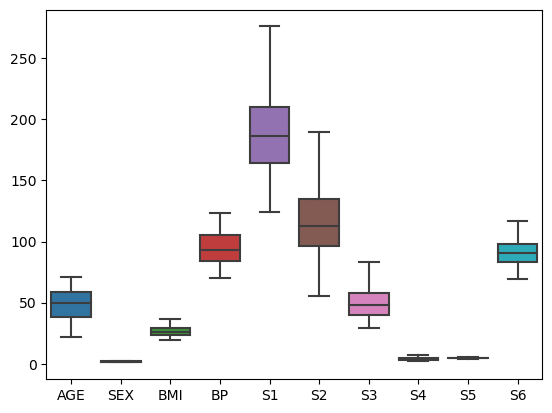

In [11]:
# Winsorization

for column in df.columns:
    if column != 'PROGRESSION':
        mstats.winsorize(df[column], limits=[0.02, 0.02], inplace=True)
# mstats.winsorize(df.drop(columns=['Progression']), limits=[0.25, 0.25], inplace=True)
sns.boxplot(df.drop(columns=['PROGRESSION']))

### Scaling

The features seem to be scaled with some unknown technique, so i will skip that aspect.

In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA

In [13]:
# scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler = RobustScaler()

In [14]:
# Scale data and convert to dataframe


df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
df.head(5)

AGE  SEX       BMI        BP        S1        S2        S3   S4  \
0  0.433735  1.0  1.053498  0.380952 -0.637363 -0.514954 -0.571429  0.0   
1 -0.096386  0.0 -0.674897 -0.285714 -0.065934 -0.254876  1.257143 -0.5   
2  1.012048  1.0  0.790123  0.000000 -0.659341 -0.504551 -0.400000  0.0   
3 -1.253012  0.0 -0.065844 -0.428571  0.263736  0.478544 -0.457143  0.5   
4  0.000000  0.0 -0.444444  0.380952  0.131868  0.322497  0.228571  0.0   

         S5        S6  PROGRESSION  
0  0.332755 -0.271186     0.084337  
1 -1.010756 -1.491525    -0.526104  
2  0.073213 -0.406780     0.004016  
3  0.375087 -0.135593     0.526104  
4 -0.457391 -0.745763    -0.044177

/home/eedriz_/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


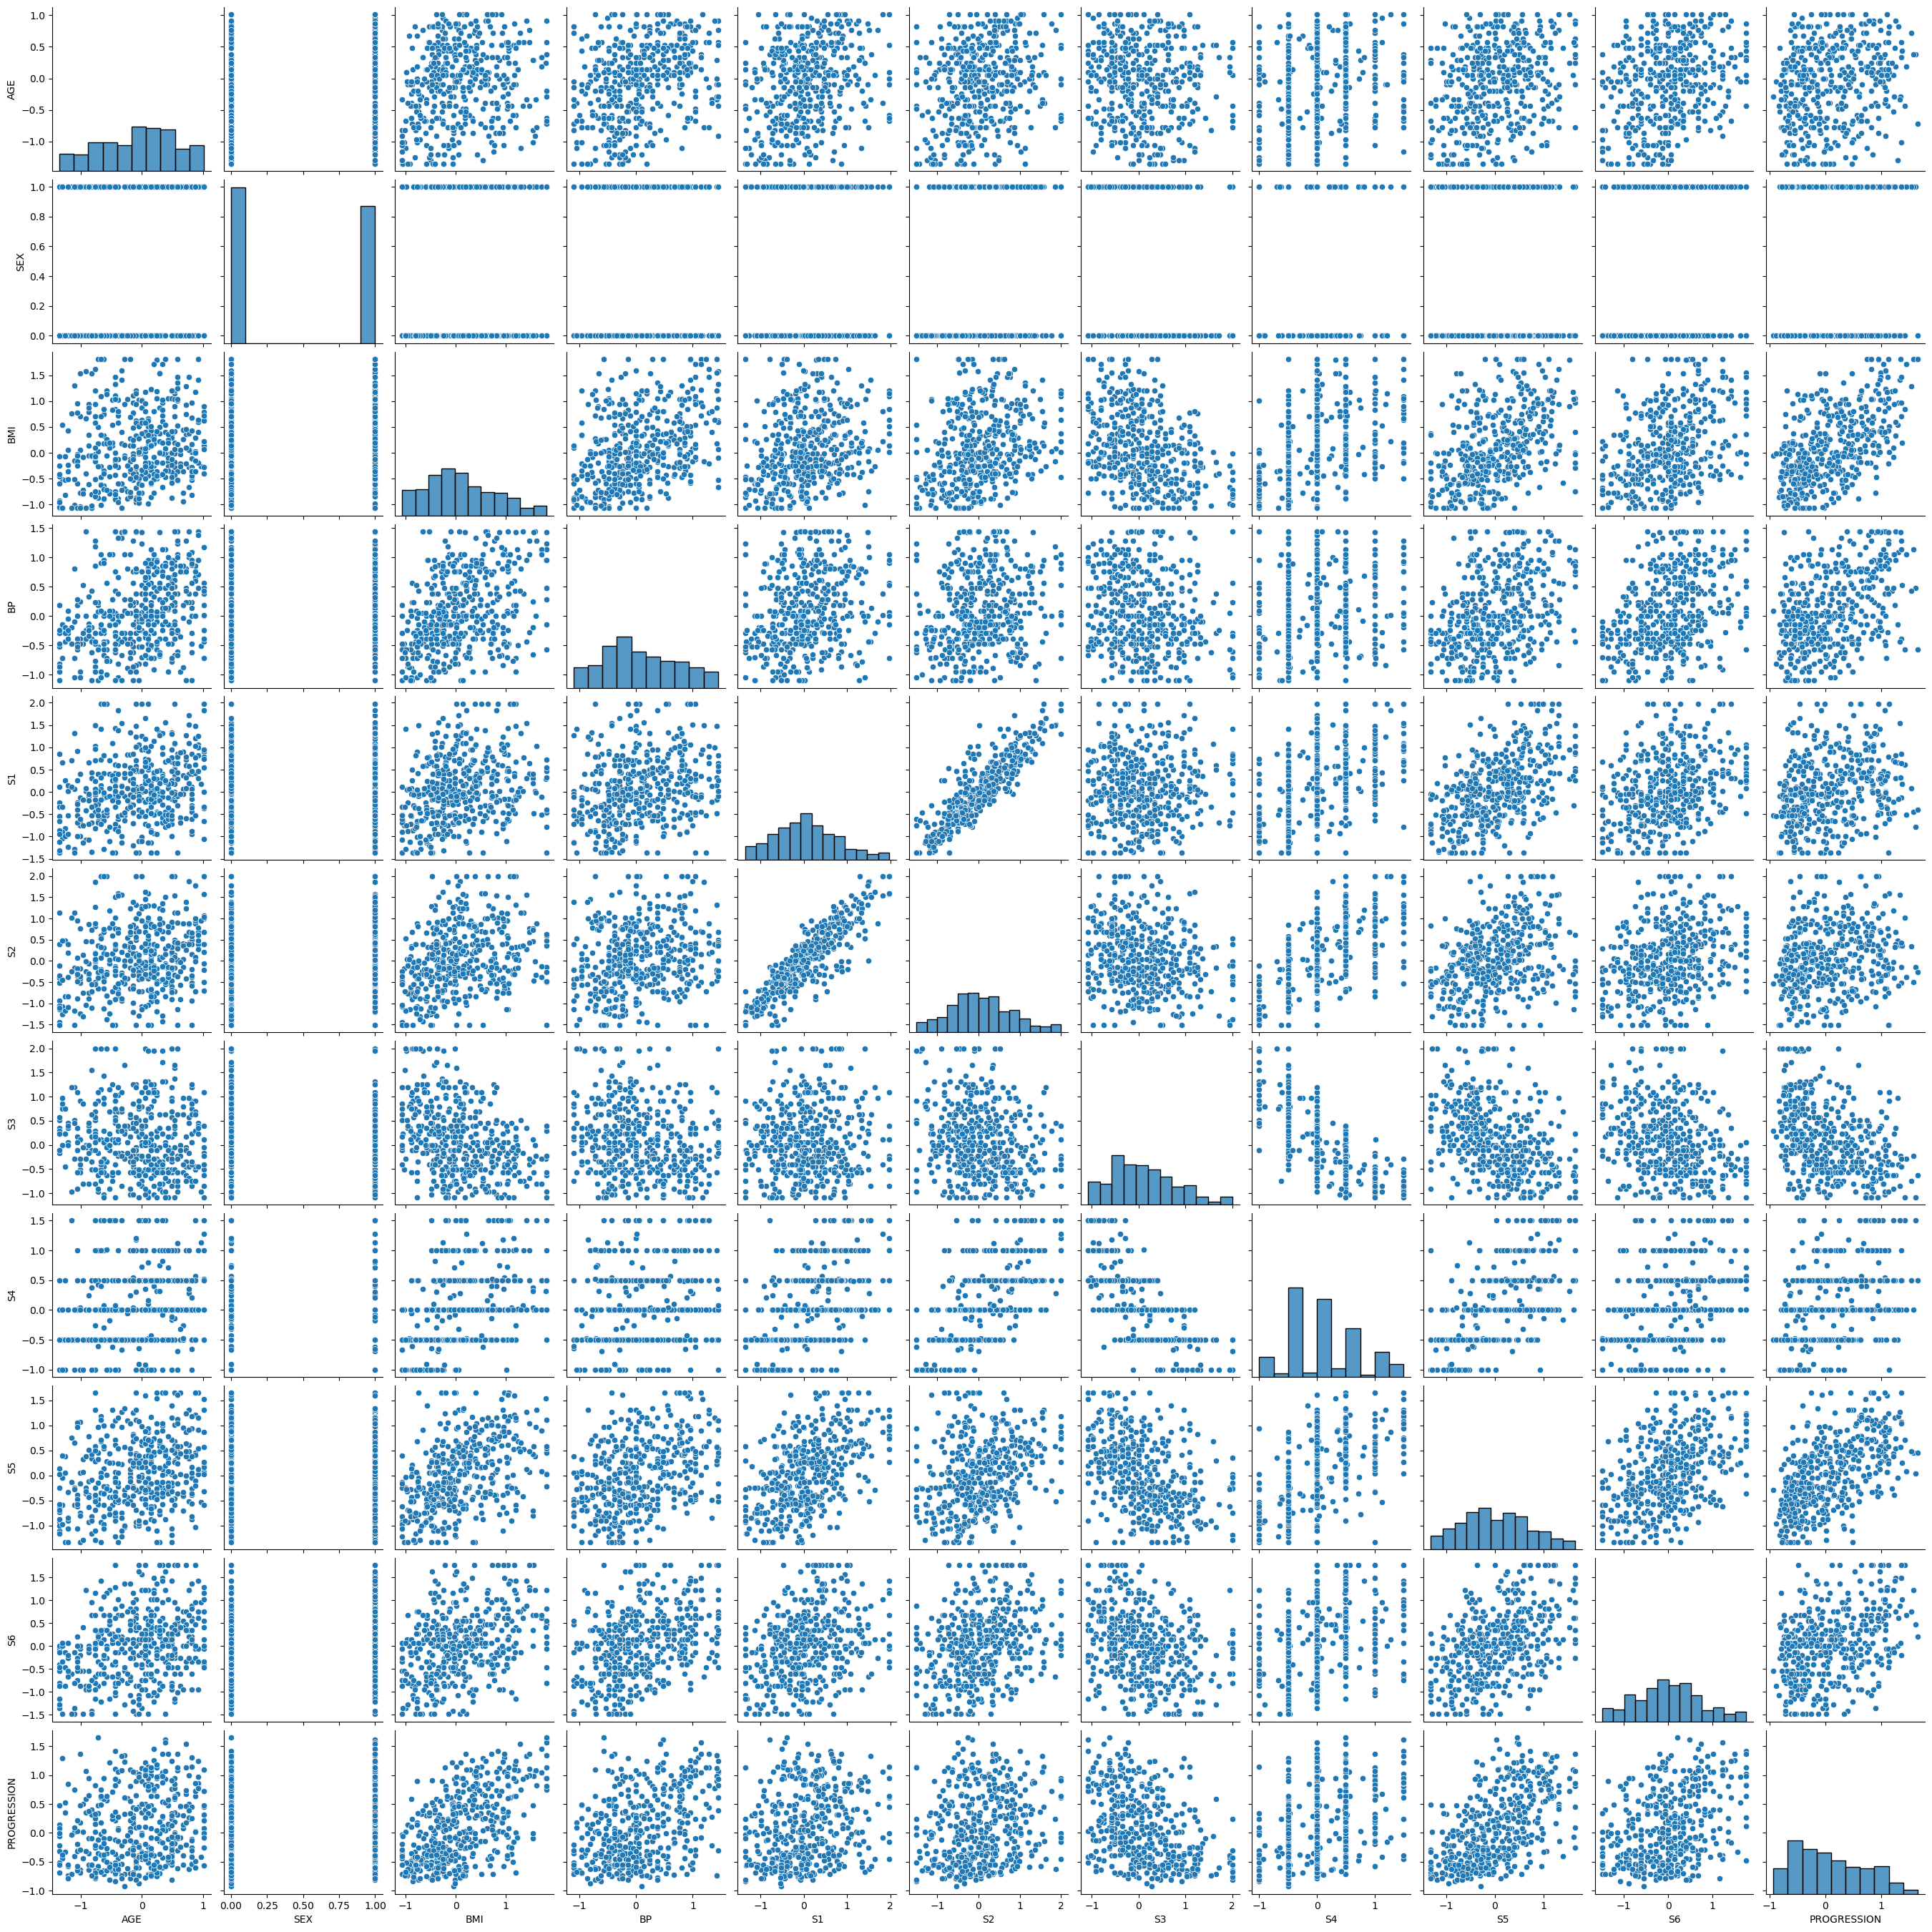

In [15]:
# View the bivariate and univariate distribution using pairplot
# plt.figure(fig)
sns.pairplot(df)
plt.show()

In [16]:
df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    -0.072834    0.468326    0.106251    0.078355    0.068868    0.059306   
std      0.621397    0.499561    0.705063    0.645013    0.740303    0.764250   
min     -1.349398    0.000000   -1.069959   -1.095238   -1.362637   -1.508453   
25%     -0.566265    0.000000   -0.411523   -0.428571   -0.478022   -0.440832   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.433735    1.000000    0.588477    0.571429    0.521978    0.559168   
max      1.012048    1.000000    1.810700    1.444286    1.978022    1.997399   

               S3          S4          S5          S6  PROGRESSION  
count  442.000000  442.000000  442.000000  442.000000   442.000000  
mean     0.095475    0.027353    0.026825    0.016566     0.093442  
std      0.705840    0.623083    0.702070    0.748877     0.619221  
min     -1.085714   -1.000000   -1.327481   -1.491525    -0.927711  
25%     -0.442857   -0.500000   -0.476544   -0.525424    -0.429719  
50%      0.000000    0.000000    0.000000    0.000000     0.000000  
75%      0.557143    0.500000    0.523456    0.474576     0.570281  
max      2.000000    1.500000    1.648924    1.762712     1.650602

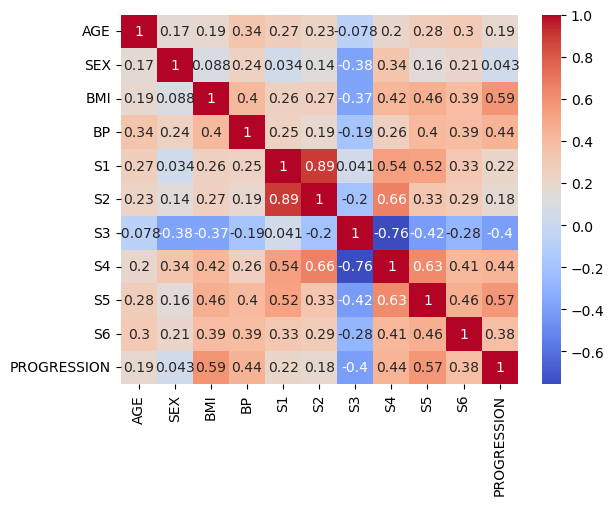

In [17]:
# correlation between variables

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

There is an almost perfect positive correlation between `s1` and `s2` this features can be further reduced in dimenssion using principal component analysis (PCA). As there are noticeable correlation between `s1`, `s2`, `s3` and `s4`.

In [18]:
y = df['PROGRESSION'].to_numpy().reshape(-1, 1) # Dependent variable
x = df.drop(columns='PROGRESSION').to_numpy() #Independent variables

print(f"x = {x.shape} \n y = {y.shape}")

x = (442, 10) 
 y = (442, 1)


In [19]:
# import ML libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
# Split dataset with the 8:2 ratio for train:test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

### Principal component analysis for dimension reduction.

In [21]:
# # for i in range(2, 5):
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(X_train)

In [22]:
# df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
# df_pca.head()

### Model building

In [23]:
algo = LinearRegression() # Create an instance of the linear regression class
algo.fit(X_train, y_train) # Fit the model with the train data
# algo.fit(df_pca, y_train) # Fit data with PCA dataframe

LinearRegression()

In [24]:
# # Transform test

# pca_test = np.dot(X_test, pca.components_.T)
# pca_test = pd.DataFrame(pca_test, columns=['PC1', 'PC2'])

In [25]:
y_pred = algo.predict(X_test) # Make prediction with the test X
# y_pred = algo.predict(pca_test)

<Axes: >

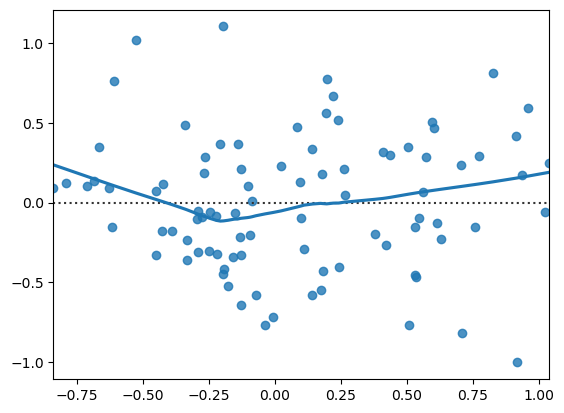

In [34]:
residual = y_test - y_pred
sns.residplot(y=residual, x=y_pred, lowess=True)
# sns.scatterplot(y_pred)
# plt.plot(y_pred, residual)
# y_pred

<Axes: ylabel='Density'>

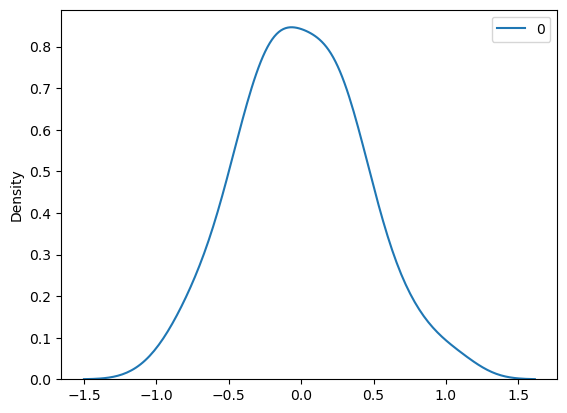

In [27]:
sns.kdeplot(residual)

The residuals seem to be normally distributed

### Model evaluation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"R^2 value: {round(r2*100, 4)}%")

R^2 value: 56.3795%


In [30]:
MSerror = mean_squared_error(y_true=y_test, y_pred=y_pred)
print(f"Mean Squared Error: {round(MSerror, 4)}")

Mean Squared Error: 0.176


In [31]:
algo.intercept_

array([0.13333273])

In [32]:
algo.coef_

array([[ 0.00700688, -0.19154089,  0.26655794,  0.18785701, -0.41121397,
         0.2143342 ,  0.07696046,  0.12170145,  0.41866698,  0.05609564]])

SyntaxError: invalid syntax (2794071594.py, line 1)

$$
Y = \beta_0 + \sum_{i=1}^{n} \beta_i x_i + \epsilon  \tag{1}
$$
$$
\hat{y} = 0.1333 + 0.000 x_{1} -0.1915 x_{2} + 0.2666 x_{3} + 0.1879 x_{4} - 0.4112 x_{5} + 0.2143 x_{6} + 0.0770 x_{7} + 0.1217 x_{8} + 0.4187 x_{9} + 0.0561 x_{10} \tag{2}
$$

where $x_{1}$ to $x_{10}$ are the input variables and $\hat{y}$ the estimated y


The model in (2) explains around `56.3795%` of observations with a mean squared error of `0.176`.

In [ ]:
# fig, ax = plt.subplots(nrows=2, ncols=5)

# for i in range(X_test.shape[1]):
#     sns.

R^2 value: 46.0296%

Mea Squared Error: 3363.3833

**With minmax scaling**
R^2 value: 46.4019
Mean Squared Error: 0.034

**With PCA**
R^2 value: 27.2841%
Mean Squared Error: 0.67